<a href="https://colab.research.google.com/github/prrm4k/simple_fraud_kaggle/blob/main/Fraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Загружаем необходимые библиотеки и инструменты

In [1]:
import pandas as pd
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import Log
import seaborn as sns
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('creditcard.csv')

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19898 entries, 0 to 19897
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    19898 non-null  int64  
 1   V1      19898 non-null  float64
 2   V2      19898 non-null  float64
 3   V3      19898 non-null  float64
 4   V4      19898 non-null  float64
 5   V5      19898 non-null  float64
 6   V6      19898 non-null  float64
 7   V7      19898 non-null  float64
 8   V8      19898 non-null  float64
 9   V9      19898 non-null  float64
 10  V10     19898 non-null  float64
 11  V11     19897 non-null  float64
 12  V12     19897 non-null  float64
 13  V13     19897 non-null  float64
 14  V14     19897 non-null  float64
 15  V15     19897 non-null  float64
 16  V16     19897 non-null  float64
 17  V17     19897 non-null  float64
 18  V18     19897 non-null  float64
 19  V19     19897 non-null  float64
 20  V20     19897 non-null  float64
 21  V21     19897 non-null  float64
 22

In [5]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       1
V12       1
V13       1
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

Видно, что у нескольких признаков присутствует одно пропущенное значение

Визаульно можно определить, что это последняя строка датафрейма

Удалим ее

In [6]:
df.iloc[-1]

Time      30633.000000
V1           -2.609841
V2            2.479357
V3            0.763844
V4            0.044509
V5           -0.645716
V6            0.762867
V7           -1.626415
V8           -7.617854
V9            1.399746
V10           1.000000
V11                NaN
V12                NaN
V13                NaN
V14                NaN
V15                NaN
V16                NaN
V17                NaN
V18                NaN
V19                NaN
V20                NaN
V21                NaN
V22                NaN
V23                NaN
V24                NaN
V25                NaN
V26                NaN
V27                NaN
V28                NaN
Amount             NaN
Class              NaN
Name: 19897, dtype: float64

In [7]:
df = df.iloc[:-1]

# Проведем визуальный анализ

Text(0.5, 1.0, 'Зависимость номера транзакции от времени между операциями')

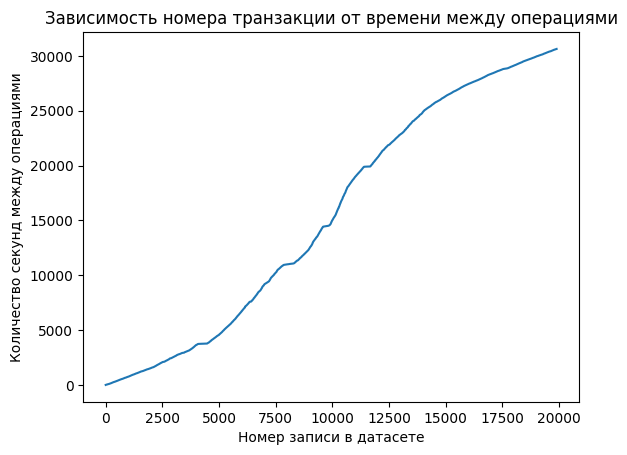

In [8]:
df.Time.plot()
plt.xlabel('Номер записи в датасете')
plt.ylabel('Количество секунд между операциями')
plt.title('Зависимость номера транзакции от времени между операциями')

Text(0.5, 1.0, 'Анализ корреляций между всеми признаками')

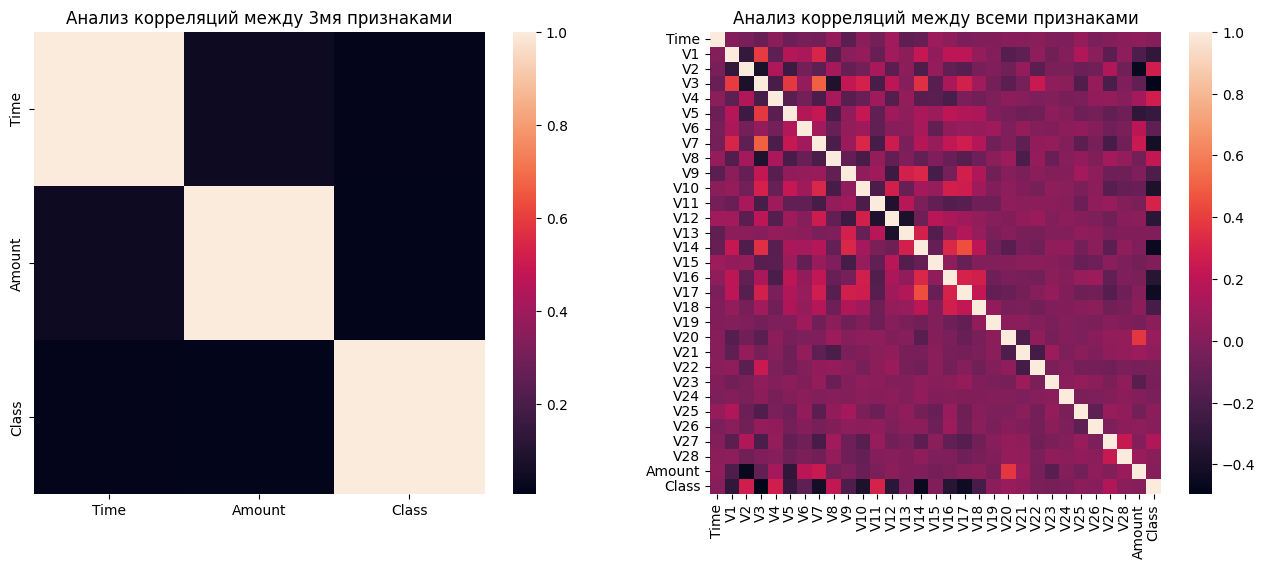

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(16,6))
ax[0].set_title('Анализ корреляций между 3мя признаками')
sns.heatmap(df[['Time', 'Amount','Class']].corr(), ax = ax[0])
sns.heatmap(df.corr(), ax = ax[1])
ax[1].set_title('Анализ корреляций между всеми признаками')

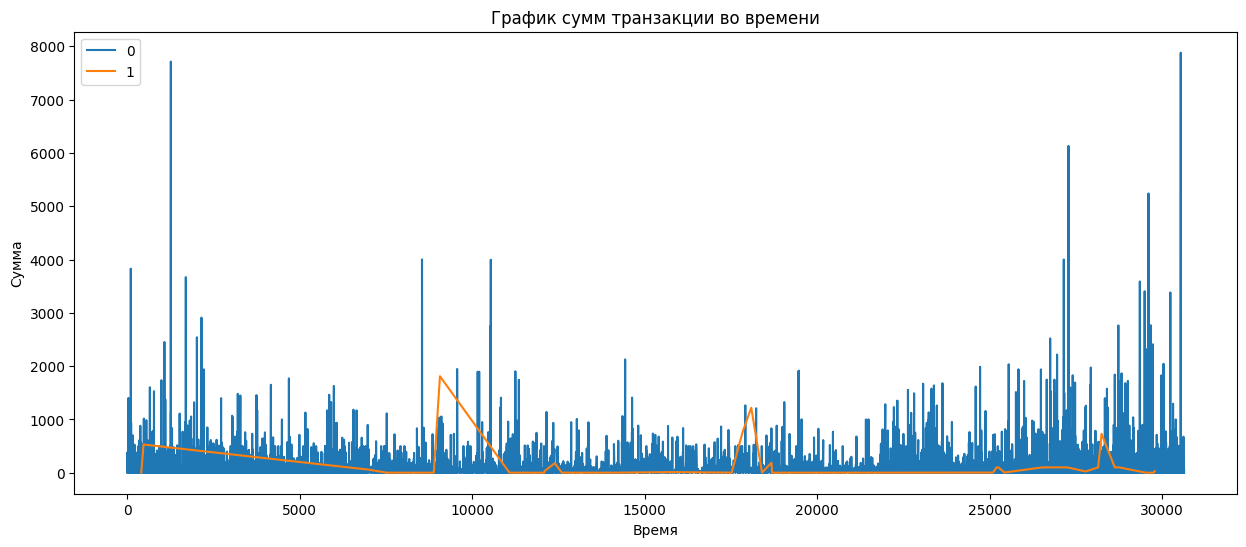

In [72]:
plt.figure(figsize=(15,6))
plt.plot(df.Time.loc[df.Class==0], df.Amount.loc[df.Class==0])
plt.plot(df.Time.loc[df.Class==1], df.Amount.loc[df.Class==1])
plt.xlabel('Время')
plt.ylabel('Сумма')
plt.title('График сумм транзакции во времени')
plt.legend('01')

# Проверим баланс классов

In [11]:
 rat = len(df.Class)/sum(df.Class)
 rat

234.08235294117648

In [12]:
balanced_data = pd.concat([df.loc[df.Class==0], df.loc[df.Class==1].loc[df.loc[df.Class==1].index.repeat(rat)]] )

In [13]:
df1 = balanced_data.sample(frac=1).reset_index(drop=True)

In [14]:
df1.Class.value_counts()

1.0    19890
0.0    19812
Name: Class, dtype: int64

# Когда классы сбалансированиы можно обучить модель

In [21]:
mod1 =HistGradientBoostingClassifier()

In [22]:
X_train, X_test, y_train, y_test =train_test_split(df1.drop(columns='Class'), df1.Class, test_size=0.3)

In [23]:
mod1.fit(X_train, y_train)

HistGradientBoostingClassifier()

In [24]:
ypr1=mod1.predict(X_test)

In [25]:
accuracy_score(ypr1, y_test), precision_score(ypr1, y_test), recall_score(ypr1, y_test)

(0.9995802199647384, 1.0, 0.9991734170937345)

# Модель дала отличные результаты, но построим еще несколько моделей

In [26]:
from sklearn.linear_model import LogisticRegression
ypr2 = LogisticRegression().fit(X_train, y_train).predict(X_test)
accuracy_score(ypr2, y_test), precision_score(ypr2, y_test), recall_score(ypr2, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(0.9598690286289984, 0.9649238914626076, 0.9563791407018695)

In [27]:
from sklearn.svm import SVC
ypr3 = SVC().fit(X_train, y_train).predict(X_test)
accuracy_score(ypr3, y_test), precision_score(ypr3, y_test), recall_score(ypr3, y_test)

(0.6605658634875325, 0.9164460622104567, 0.610223642172524)

In [28]:
from sklearn.tree import DecisionTreeClassifier
ypr4 = DecisionTreeClassifier().fit(X_train, y_train).predict(X_test)
accuracy_score(ypr4, y_test), precision_score(ypr4, y_test), recall_score(ypr4, y_test)

(0.9994123079506338, 1.0, 0.9988431664187738)

# Как видно из результатов, модель градиентного бустинга справляется лучше всего. Ближайшая по качеству - модель решающего дерева, а остальные заметно отстают

Сохраним полученную модель

In [33]:
import pickle
with open("ML_model.pkl", "wb") as f:
    pickle.dump(mod1, f)

Загрузка модели

In [34]:
with open("ML_model.pkl", "rb") as f:
    model = pickle.load(f)